<a href="https://colab.research.google.com/github/nisha-s10/Pattern-Recognition-Lab-AFI504/blob/main/Experiment%203/Experiment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### STEP 1: Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

### STEP 2: Load Dataset

In [2]:
data = load_wine()

X = data.data
y = data.target

print("Dataset shape:", X.shape)

Dataset shape: (178, 13)


### STEP 3: Select One Feature for 1D Gaussian Modeling

In [3]:
feature = X[:, 0]

# Standardize for better visualization
scaler = StandardScaler()
feature = scaler.fit_transform(feature.reshape(-1,1)).flatten()

### STEP 4: MLE Estimation
MLE estimates parameters by maximizing likelihood:

$$
\hat{\mu}_{MLE} = \frac{1}{N} \sum_{i=1}^{N} x_i
$$

$$
\hat{\sigma}_{MLE}^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \hat{\mu})^2
$$

In [4]:
N = len(feature)

mu_mle = np.mean(feature)
sigma2_mle = np.sum((feature - mu_mle)**2) / N

print("MLE Mean:", mu_mle)
print("MLE Variance:", sigma2_mle)

MLE Mean: -8.382807556720283e-16
MLE Variance: 1.0


### Log-Likelihood Visualization
MLE is obtained by maximizing likelihood.

So let’s visualize log-likelihood as a function of μ.

This shows mathematically why MLE works.

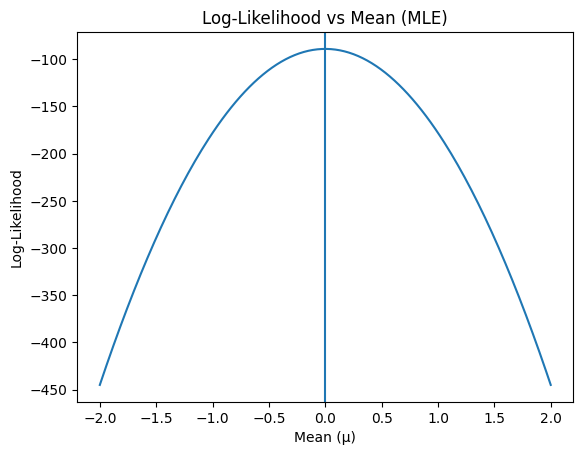

In [5]:
mu_values = np.linspace(-2, 2, 200)
log_likelihood = []

for mu in mu_values:
    ll = -0.5 * np.sum((feature - mu)**2) / sigma2_mle
    log_likelihood.append(ll)

plt.figure()
plt.plot(mu_values, log_likelihood)
plt.axvline(mu_mle)
plt.title("Log-Likelihood vs Mean (MLE)")
plt.xlabel("Mean (μ)")
plt.ylabel("Log-Likelihood")
plt.show()

### STEP 5: MAP Estimation
Assume prior:

*   Prior mean = 0
*   Prior variance = 1

MAP incorporates prior belief.

Assume:

$$
\mu \sim \mathrm{N}(\mu_0, \tau^2)
$$

Then:

$$
\hat{\mu}_{MAP} =
\frac{\frac{N}{\sigma^2}\bar{x} + \frac{1}{\tau^2}\mu_0}
{\frac{N}{\sigma^2} + \frac{1}{\tau^2}}
$$

MAP shrinks estimate toward prior mean.

In [6]:
mu0 = 0
tau2 = 1

mu_map = ((N/sigma2_mle)*mu_mle + (1/tau2)*mu0) / ((N/sigma2_mle) + (1/tau2))

print("MAP Mean:", mu_map)

MAP Mean: -8.335976229587768e-16


### Posterior Visualization for MAP
MAP maximizes posterior:

$$
\log P(\mu \mid X) = \log P(X \mid \mu) + \log P(\mu)
$$

Let’s visualize posterior curve.

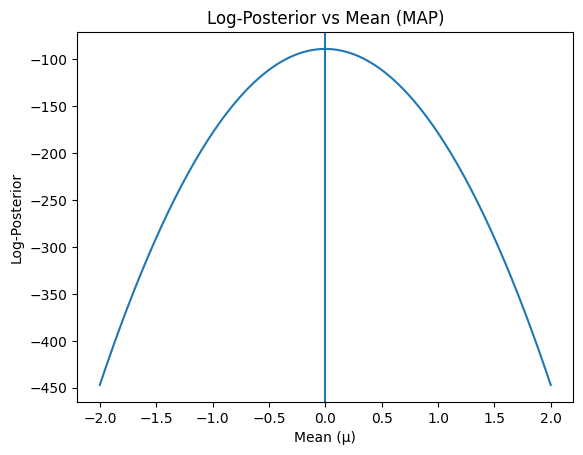

In [7]:
posterior = []

for mu in mu_values:
    likelihood = -0.5 * np.sum((feature - mu)**2) / sigma2_mle
    prior = -0.5 * (mu - mu0)**2 / tau2
    posterior.append(likelihood + prior)

plt.figure()
plt.plot(mu_values, posterior)
plt.axvline(mu_map)
plt.title("Log-Posterior vs Mean (MAP)")
plt.xlabel("Mean (μ)")
plt.ylabel("Log-Posterior")
plt.show()

### STEP 6: Plot Gaussian Curves

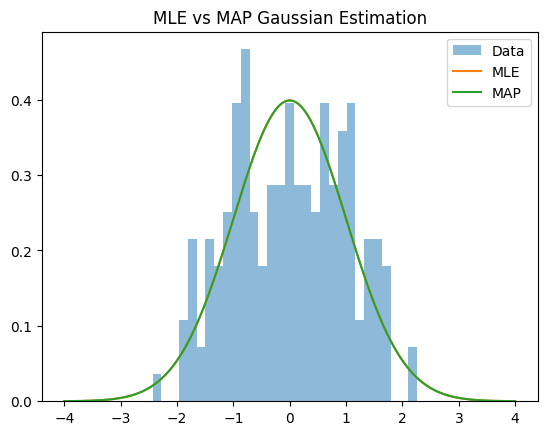

In [8]:
def gaussian(x, mu, sigma2):
    return (1/np.sqrt(2*np.pi*sigma2)) * \
           np.exp(-(x-mu)**2/(2*sigma2))

x_vals = np.linspace(-4,4,500)

plt.figure()

# Histogram
plt.hist(feature, bins=30, density=True, alpha=0.5, label="Data")

# MLE curve
plt.plot(x_vals, gaussian(x_vals, mu_mle, sigma2_mle), label="MLE")

# MAP curve
plt.plot(x_vals, gaussian(x_vals, mu_map, sigma2_mle), label="MAP")

plt.legend()
plt.title("MLE vs MAP Gaussian Estimation")
plt.show()

### Effect of Small Sample Size

In [9]:
small_sample = feature[:10]
N_small = len(small_sample)

mu_mle_small = np.mean(small_sample)

mu_map_small = ((N_small/sigma2_mle)*mu_mle_small + (1/tau2)*mu0) / \
               ((N_small/sigma2_mle) + (1/tau2))

print("Small Sample MLE:", mu_mle_small)
print("Small Sample MAP:", mu_map_small)

Small Sample MLE: 1.1776794106426902
Small Sample MAP: 1.0706176460388093


### Bias-Variance Explanation Plot

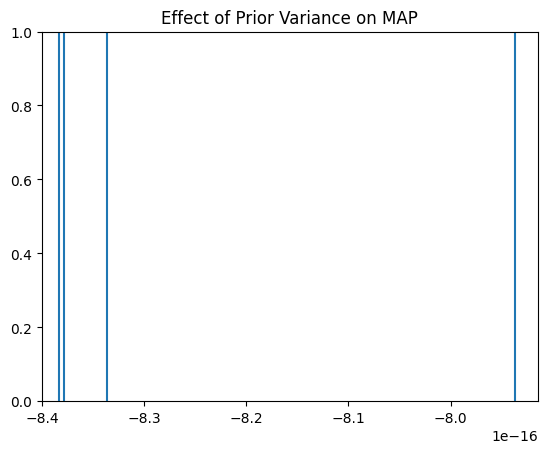

In [10]:
tau_values = [0.1, 1, 10]
plt.figure()

for tau2 in tau_values:
    mu_map_temp = ((N/sigma2_mle)*mu_mle + (1/tau2)*mu0) / ((N/sigma2_mle) + (1/tau2))
    plt.axvline(mu_map_temp)

plt.axvline(mu_mle)
plt.title("Effect of Prior Variance on MAP")
plt.show()